# Maximum and Minimum Thickness Constraints

Trying to re-implement this: https://www.sciencedirect.com/science/article/pii/S0045782514003065


In [330]:
include("./julia/include/_topologyOptimization.jl")

Loaded Topology Optimization Library!


## Top Opt MMA

"Minimum compliance problem with MMA"

"ndes: 120 x 60"

"volfrac: 0.4 rmin: 1.5 penal: 3"

(94.28277445683601, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0e-9, 1.0e-9  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], :MAXEVAL_REACHED)

"got 94.28277445683601 after 100 iterations (returned MAXEVAL_REACHED)"

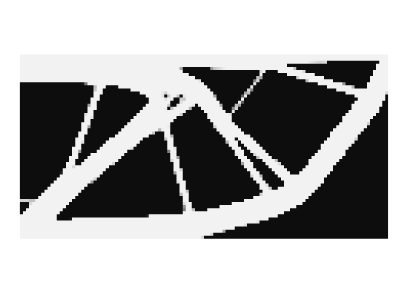

  7.672618 seconds (22.21 k allocations: 6.146 GiB, 6.62% gc time)


In [52]:
nelx=120
nely=60
volfrac=0.4
rmin=1.5
penal=3
maxEval=100
xPhys=topologyOptimizationMMA(nelx,nely,volfrac,rmin,penal,maxEval);


## Skeleton

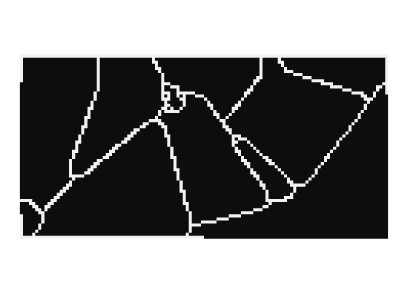

In [53]:
include("./julia/traceskeleton.jl")

bim=xPhys.>=0.5;
bim = thinning_zs(bim)

Plots.heatmap(bim, aspect_ratio=:equal, legend=false, axis=nothing,foreground_color_subplot=colorant"white",fc=:grays)
# H,W = size(bim)
# @time q = trace_skeleton(bim,10,999)
# print(" -->")
# print(polylines_to_svg(q,W,H))

# using ColorTypes
# img = convert(Array{ColorTypes.Gray{Bool}}, convert(Array{Bool},bim))
# save("out.jpg",img)

In [226]:
using ImageBinarization
imgb = binarize(xPhys, Otsu())

60×120 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0

In [224]:
import Pkg; Pkg.add("ImageBinarization")

  Resolving package versions...
  Installed LazyArtifacts ───────── v1.3.0
  Installed HistogramThresholding ─ v0.2.5
  Installed Intervals ───────────── v1.5.0
  Installed Polynomials ─────────── v2.0.14
  Installed ImageBinarization ───── v0.2.7
  Installed TimeZones ───────────── v1.5.7
Updating `~/.julia/environments/v1.5/Project.toml`
  [cbc4b850] + ImageBinarization v0.2.7
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [2c695a8d] + HistogramThresholding v0.2.5
  [cbc4b850] + ImageBinarization v0.2.7
  [d8418881] + Intervals v1.5.0
  [4af54fe1] + LazyArtifacts v1.3.0
  [d8a4904e] + MutableArithmetics v0.2.20
  [f27b6e38] + Polynomials v2.0.14
  [f269a46b] + TimeZones v1.5.7
   Building TimeZones → `~/.julia/packages/TimeZones/kDO1y/deps/build.log`


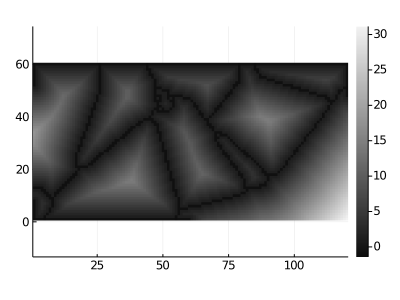

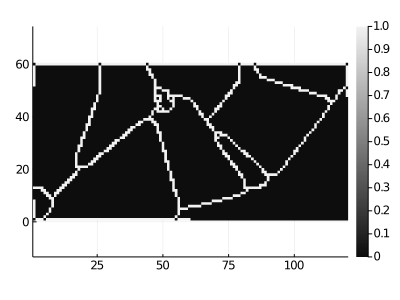

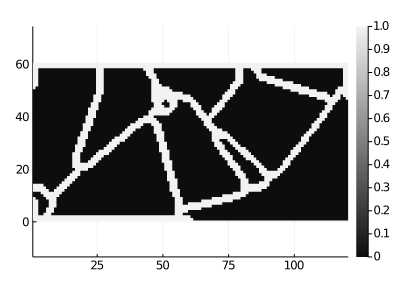

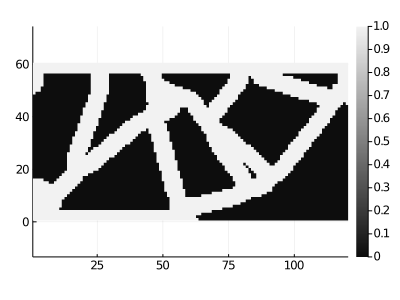

In [54]:
using SignedDistanceFields
xPhys1=xPhys.>=0.5;

ss=sdf(xPhys1)
ss=sdf(bim)

display(Plots.heatmap(ss, aspect_ratio=:equal,fc=:grays))
sss=(ss.==-1)
display(Plots.heatmap(sss, aspect_ratio=:equal,fc=:grays))

tmin=1
tmax=3

Imin=((ss.>=0) .& (ss.<=tmin))
Imin=( (ss.<=tmin))

display(Plots.heatmap(Imin, aspect_ratio=:equal,fc=:grays))


Imax=((ss.>=0) .& (ss.<=tmax))
Imax=((ss.<=tmax))

display(Plots.heatmap(Imax, aspect_ratio=:equal,fc=:grays))


## Top Opt MMA with Skeleton

In [284]:
using ImageBinarization
using SignedDistanceFields
include("./julia/traceskeleton.jl")

function topologyOptimizationMinMaxThickness(nelx,nely,prob,volfrac,rmin,penal,maxEval,tmin,tmax,min_max=true)
    # Max and min stiffness
    Emin=1e-2;
    Emax=1.0;

    # dofs:
    ndof = 2*(nelx+1)*(nely+1)
    # Allocate design variables (as array), initialize and allocate sens.
    x=volfrac * ones(Float64,nely,nelx)
    xold=copy(x)
    xPhys=copy(x)
    g=0 # must be initialized to use the NGuyen/Paulino OC approach
    dc=zeros(Float64,(nely,nelx))

    # FE: Build the index vectors for the for coo matrix format.
    KE=lk()
    nodenrs = reshape(1:(1+nelx)*(1+nely),1+nely,1+nelx)
    edofVec = reshape(2*nodenrs[1:end-1,1:end-1].+1,nelx*nely,1)
    edofMat = repeat(edofVec,1,8).+repeat([0 1 2*nely.+[2 3 0 1] -2 -1],nelx*nely,1)
    iK = convert(Array{Int},reshape(kron(edofMat,ones(8,1))',64*nelx*nely,1))
    jK = convert(Array{Int},reshape(kron(edofMat,ones(1,8))',64*nelx*nely,1))
    
    # DEFINE LOADS AND SUPPORTS (HALF MBB-BEAM)
    #F = sparse([2],[1],[-1.0],2*(nely+1)*(nelx+1),1)
    #U = zeros(2*(nely+1)*(nelx+1),1)
    #fixeddofs = union(1:2:2*(nely+1),2*(nelx+1)*(nely+1))
    #alldofs = 1:(2*(nely+1)*(nelx+1))
    #freedofs = setdiff(alldofs,fixeddofs)
    
    U,F,freedofs=prob(nelx,nely) 
    
    
    H,Hs=make_filter(nelx,nely,rmin)

    nel=nely*nelx

    function FA(x::Vector, grad::Vector)

        xPhys=reshape(x,nely,nelx)

        sK = reshape(KE[:]*(Emin.+xPhys[:]'.^penal*(Emax-Emin)),64*nelx*nely,1)
        K = sparse(vec(iK),vec(jK),vec(sK)); K = (K+K')/2
        @timed U[freedofs] = K[freedofs,freedofs] \ Array(F[freedofs])
        # Objective function and sensitivity analysis
        ce = reshape(sum((U[edofMat]*KE).*U[edofMat],dims=2),nely,nelx)
        c = sum(sum((Emin.+xPhys.^penal*(Emax-Emin)).*ce))

        dc = -penal*(Emax-Emin)*xPhys.^(penal-1).*ce
        dc[:] = H*(dc[:]./Hs)

        grad[:] .= dc[:]

        return c
    end



    function G(x::Vector, grad::Vector)
        dv = ones(nely,nelx)
        dv[:] = H*(dv[:]./Hs)

        grad[:] .=  dv[:]

        return (sum(x) - volfrac*nel)
    end

    function Gmin(x::Vector, grad::Vector)

        xPhys1=Bool.(binarize(reshape(x,nely,nelx), Otsu()))
        #reshape(x,nely,nelx).>=0.5;
        bim = thinning_zs(xPhys1) # get the skeleton (check algorithm is correct with matlab (boundary conditions))
        ss=sdf(bim) # signed distance field form skeletom
        Imin= (ss.<=tmin) # all the ones that respect the min distance
        # Imax= (ss.>tmax) # all the ones that respect the max distance
        dv = zeros(nely,nelx)
        dv[Imin[:]].=2 .*(x[Imin[:]] .-Emax)


        # dv[:] = H*(dv[:]./Hs)
        grad[:] .=  dv[:]

        return sum((x[Imin[:]].-Emax).^2)-startt/iterr
    end

    function Gmax(x::Vector, grad::Vector)

        xPhys1=Bool.(binarize(reshape(x,nely,nelx), Otsu()))
        #reshape(x,nely,nelx).>=0.5;
        bim = thinning_zs(xPhys1) # get the skeleton (check algorithm is correct with matlab (boundary conditions))
        ss=sdf(bim) # signed distance field form skeletom
        #Imin= (ss.<=tmin) # all the ones that respect the min distance
        Imax= (ss.>tmax) # all the ones that respect the max distance
        dv = zeros(nely,nelx)
        dv[Imax[:]].=2 .*(x[Imax[:]] .-Emin)


        # dv[:] = H*(dv[:]./Hs)
        grad[:] .=  dv[:]

        return sum((x[Imax[:]].-Emin).^2)-startt/iterr
    end



    iterr=1
    startt=100 #100

    FA(ones(nel)*volfrac, fill(volfrac,nel))
    G(ones(nel)*volfrac, fill(volfrac,nel))
    Gmin(ones(nel)*volfrac, fill(volfrac,nel))
    Gmax(ones(nel)*volfrac, fill(volfrac,nel))
    
    
    
    opt = Opt(:LD_MMA, nel)
    opt.lower_bounds = fill(Emin,nel)
    opt.upper_bounds = fill(Emax,nel)
    opt.xtol_rel = 1e-9
    

    opt.min_objective = FA
    inequality_constraint!(opt, (x,gg) -> G(x,gg), 1e-9)
    if min_max
        steps=4
        opt.maxeval = Int(maxEval/steps)
        inequality_constraint!(opt, (x,gg) -> Gmin(x,gg), 1e-4)
        inequality_constraint!(opt, (x,gg) -> Gmax(x,gg), 1e-4)
        
        #display(@time (minf,minx,ret) = optimize(opt, ones(nel).*volfrac))
        minx=ones(nel).*volfrac
        for i=1:steps
            (minf,minx,ret) = optimize(opt, minx)
            numevals = opt.numevals # the number of function evaluations
            display("got $minf after $numevals iterations (returned $ret)")
            display(100/iterr)
            iterr+=10
        end
    else
        opt.maxeval = Int(maxEval)
        display(@time (minf,minx,ret) = optimize(opt, ones(nel).*volfrac))

    end

    

    xPhys=reshape(minx,nely,nelx)
    display(Plots.heatmap(xPhys, aspect_ratio=:equal, legend=false, axis=nothing,fc=:grays))

    return xPhys
end



topologyOptimizationMinMaxThickness (generic function with 2 methods)

(2421.0846459239247, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6295074926216466, 0.01, 0.01  …  0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], :XTOL_REACHED)

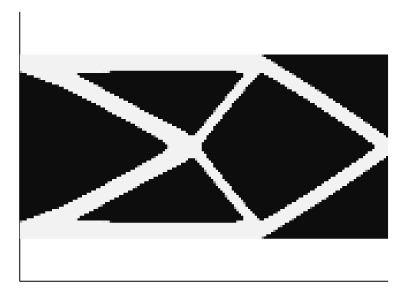

"got 17641.365849772155 after 50 iterations (returned MAXEVAL_REACHED)"

100.0

"got 14980.790925317424 after 50 iterations (returned MAXEVAL_REACHED)"

9.090909090909092

"got 15037.699827732065 after 50 iterations (returned MAXEVAL_REACHED)"

4.761904761904762

"got 15037.699910377938 after 25 iterations (returned XTOL_REACHED)"

3.225806451612903

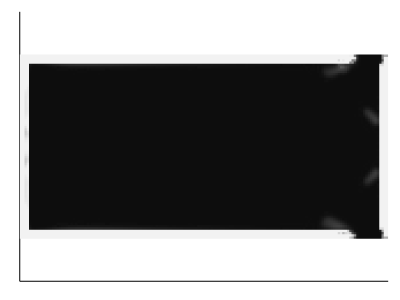

 17.100492 seconds (24.40 k allocations: 11.964 GiB, 6.34% gc time)


In [285]:
nelx=160
nely=80
volfrac=0.3
rmin=2
penal=3
maxEval=200

tmin=1.5
tmax=3.5

prob=MBB
prob=poiss


min_max=false
topologyOptimizationMinMaxThickness(nelx,nely,prob,volfrac,rmin,penal,maxEval,tmin,tmax,min_max);

min_max=true
xPhys=topologyOptimizationMinMaxThickness(nelx,nely,prob,volfrac,rmin,penal,maxEval,tmin,tmax,min_max);



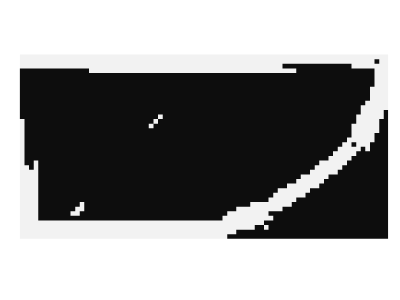

In [273]:
xPhys1=binarize(xPhys, Otsu())

display(Plots.heatmap(xPhys1, aspect_ratio=:equal, legend=false, axis=nothing, foreground_color_subplot=colorant"white",fc=:grays))


In [346]:
## SUB FUNCTION: MMA
function OCMMAThickness(x, xold1,xold2,c, dc, dv, H, Hs, volfrac, nele, move, beta,loop,low,upp)

    # display("min dc $(minimum(dc)),max dc $(maximum(dc))")
    xTilde=copy(x);nelx=size(x)[2];nely=size(x)[1];
    
    m     = 1;                # The number of general constraints.
    n     = nele;             # The number of design variables x_j.
    xmin  = ones(n).*Emin;         # Column vector with the lower bounds for the variables x_j.
    xmax  = ones(n).*Emax;        # Column vector with the upper bounds for the variables x_j.
    a0    = 1;                # The constants a_0 in the term a_0*z.
    a     = zeros(m);       # Column vector with the constants a_i in the terms a_i*z.
    c_MMA = 10000*ones(m);  # Column vector with the constants c_i in the terms c_i*y_i.
    d     = zeros(m);       # Column vector with the constants d_i in the terms 0.5*d_i*(y_i)^2.
    
    
    # METHOD OF MOVING ASYMPTOTES
    xval  = x[:];
    f0val = c;
    df0dx = dc[:];
    fval  = sum(x[:])/(volfrac*nele) .- 1.0;
    dfdx  = dv[:]' / (volfrac*nele);
    # xmin=max.(0.0, x[:].-move);
    # xmax=min.(1, x[:].+move);


    xmma, ymma, zmma, lam, xsi, eta_, mu, zet, s, low, upp = mmasub(m, n, loop, xval[:], xmin[:], xmax[:], xold1[:], xold2[:], f0val,df0dx,fval,dfdx,low,upp,a0,a,c_MMA,d);

    # Update MMA Variables
    xnew     = reshape(xmma,nely,nelx);
    xTilde[:] = (H*xnew[:] )./Hs; 
    xPhys = 1 .-exp.(-beta .*xTilde) .+xTilde .*exp.(-beta);
    change = maximum(abs.(xnew[:]-x[:] )); x = xnew;
    xold2    = copy(xold1);
    xold1    = copy(x);

    return x, xPhys, change,low,upp,xold1,xold2
end

function FA(x::Vector, grad::Vector)

    xPhys=reshape(x,nely,nelx)

    sK = reshape(KE[:]*(Emin.+xPhys[:]'.^penal*(Emax-Emin)),64*nelx*nely,1)
    K = sparse(vec(iK),vec(jK),vec(sK)); K = (K+K')/2
    @timed U[freedofs] = K[freedofs,freedofs] \ Array(F[freedofs])
    # Objective function and sensitivity analysis
    ce = reshape(sum((U[edofMat]*KE).*U[edofMat],dims=2),nely,nelx)
    c = sum(sum((Emin.+xPhys.^penal*(Emax-Emin)).*ce))

    dc = -penal*(Emax-Emin)*xPhys.^(penal-1).*ce
    dc[:] = H*(dc[:]./Hs)

    grad[:] .= dc[:]

    return c
end



function G(x::Vector, grad::Vector)
    dv = ones(nely,nelx)
    dv[:] = H*(dv[:]./Hs)

    grad[:] .=  dv[:]

    return (sum(x) - volfrac*nel)
end

function Gmin(x::Vector, grad::Vector)

    xPhys1=Bool.(binarize(reshape(x,nely,nelx), Otsu()))
    #reshape(x,nely,nelx).>=0.5;
    bim = thinning_zs(xPhys1) # get the skeleton (check algorithm is correct with matlab (boundary conditions))
    ss=sdf(bim) # signed distance field form skeletom
    Imin= (ss.<=tmin) # all the ones that respect the min distance
    # Imax= (ss.>tmax) # all the ones that respect the max distance
    dv = zeros(nely,nelx)
    dv[Imin[:]].=2 .*(x[Imin[:]] .-Emax)


    # dv[:] = H*(dv[:]./Hs)
    grad[:] .=  dv[:]

    return sum((x[Imin[:]].-Emax).^2)-startt/iterr
end

function Gmax(x::Vector, grad::Vector)

    xPhys1=Bool.(binarize(reshape(x,nely,nelx), Otsu()))
    #reshape(x,nely,nelx).>=0.5;
    bim = thinning_zs(xPhys1) # get the skeleton (check algorithm is correct with matlab (boundary conditions))
    ss=sdf(bim) # signed distance field form skeletom
    #Imin= (ss.<=tmin) # all the ones that respect the min distance
    Imax= (ss.>tmax) # all the ones that respect the max distance
    dv = zeros(nely,nelx)
    dv[Imax[:]].=2 .*(x[Imax[:]] .-Emin)


    # dv[:] = H*(dv[:]./Hs)
    grad[:] .=  dv[:]

    return sum((x[Imax[:]].-Emin).^2)-startt/iterr
end

Gmax (generic function with 1 method)

In [347]:
using ImageBinarization
using SignedDistanceFields
include("./julia/traceskeleton.jl")
include("./julia/include/mmaSolver.jl");


function topologyOptimizationMinMaxThickness1(nelx,nely,prob,volfrac,rmin,penal,maxEval,tmin,tmax,min_max)
    # Max and min stiffness
    Emin=1e-2;Emax=1.0;

    # dofs:
    ndof = 2*(nelx+1)*(nely+1)
    # Allocate design variables (as array), initialize and allocate sens.
    x=volfrac .* ones(Float64,nely,nelx)
    xold=copy(x)
    xPhys=copy(x)
    beta = 1;
    xPhys = 1 .- exp.(-beta .*x) .+ x * exp.(-beta);

    g=0 # must be initialized to use the NGuyen/Paulino OC approach
    dc=zeros(Float64,(nely,nelx))

    # FE: Build the index vectors for the for coo matrix format.
    KE=lk()
    nodenrs = reshape(1:(1+nelx)*(1+nely),1+nely,1+nelx)
    edofVec = reshape(2*nodenrs[1:end-1,1:end-1].+1,nelx*nely,1)
    edofMat = repeat(edofVec,1,8).+repeat([0 1 2*nely.+[2 3 0 1] -2 -1],nelx*nely,1)
    iK = convert(Array{Int},reshape(kron(edofMat,ones(8,1))',64*nelx*nely,1))
    jK = convert(Array{Int},reshape(kron(edofMat,ones(1,8))',64*nelx*nely,1))
    
    # DEFINE LOADS AND SUPPORTS (HALF MBB-BEAM)    
    U,F,freedofs=prob(nelx,nely) 
    
    
    H,Hs=make_filter(nelx,nely,rmin)
    

    nel=nely*nelx
    
    xold1 = copy(x);             # xval, one iteration ago (provided that iter>1).
    xold2 = copy(x);             # xval, two iterations ago (provided that iter>2).
    low   = ones(nel);        # Column vector with the lower asymptotes from the previous iteration (provided that iter>1).
    upp   = ones(nel);        # Column vector with the upper asymptotes from the previous iteration (provided that iter>1).

    
    change=1;loop=0;
    
    for i =1:maxIter
        if (change > 0.01)
            # Start iteration
            loop += 1
            # FE-ANALYSIS
            sK = reshape(KE[:]*(Emin.+xPhys[:]'.^penal*(Emax-Emin)),64*nelx*nely,1)
            K = sparse(vec(iK),vec(jK),vec(sK)); K = (K+K')/2
            @timed U[freedofs] = K[freedofs,freedofs] \ Array(F[freedofs])
            # Objective function and sensitivity analysis
            ce = reshape(sum((U[edofMat]*KE).*U[edofMat],dims=2),nely,nelx)
            
            c = sum(sum((Emin.+xPhys.^penal*(Emax-Emin)).*ce))
            
            dc = -penal*(Emax-Emin)*xPhys.^(penal-1).*ce
            dv = ones(nely,nelx)
            dc[:] = H*(dc[:]./Hs)
            dv[:] = H*(dv[:]./Hs)
            
            
            move = 0.2;
            
            x, xPhys, change, low, upp, xold1, xold2 = OCMMA(x, xold1,xold2,c,dc, dv, H, Hs, volfrac, nel, move, beta,loop,low,upp);

            
            m=mean(xPhys[:])
            
            println(" It:$loop Obj:$(round.(c,digits=2)) Vol:$(round.(m,digits=2)) ch:$(round.(change,digits=2)) ")
            if mod(loop,5)==0
                xxx=1 .- clamp.(xPhys,0,1)
                display(Plots.heatmap(xxx,xaxis=nothing,showaxis = false,yaxis=nothing,legend=nothing,fc=:grays,clims=(0.0, 1.0),aspect_ratio=:equal))
                Plots.heatmap(xxx,xaxis=nothing,showaxis = false,yaxis=nothing,legend=nothing,fc=:grays,clims=(0.0, 1.0),aspect_ratio=:equal)

            end

            xPhys = copy(x)
        end
    end
    
    
    display(Plots.heatmap(xPhys, aspect_ratio=:equal, legend=false, axis=nothing,fc=:grays))

    return xPhys
end



topologyOptimizationMinMaxThickness1 (generic function with 2 methods)

Loaded Topology Optimization Library!
 It:1 Obj:16761.01 Vol:0.44 ch:0.44 
 It:2 Obj:9147.74 Vol:0.47 ch:0.28 
 It:3 Obj:5668.7 Vol:0.45 ch:0.25 
 It:4 Obj:5382.14 Vol:0.42 ch:0.24 


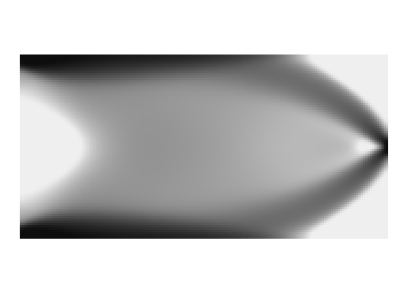

 It:5 Obj:5402.29 Vol:0.4 ch:0.2 
 It:6 Obj:5452.31 Vol:0.39 ch:0.18 
 It:7 Obj:5469.85 Vol:0.37 ch:0.19 
 It:8 Obj:5445.57 Vol:0.35 ch:0.19 
 It:9 Obj:5376.94 Vol:0.34 ch:0.19 


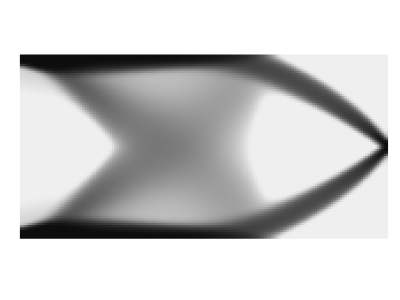

 It:10 Obj:5294.8 Vol:0.34 ch:0.18 
 It:11 Obj:5051.29 Vol:0.33 ch:0.17 
 It:12 Obj:4759.65 Vol:0.33 ch:0.16 
 It:13 Obj:4484.32 Vol:0.33 ch:0.15 
 It:14 Obj:4217.79 Vol:0.33 ch:0.14 


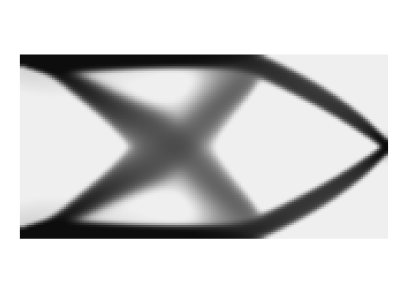

 It:15 Obj:3964.59 Vol:0.33 ch:0.14 
 It:16 Obj:3750.13 Vol:0.32 ch:0.13 
 It:17 Obj:3579.29 Vol:0.32 ch:0.14 
 It:18 Obj:3444.81 Vol:0.32 ch:0.14 
 It:19 Obj:3338.07 Vol:0.32 ch:0.14 


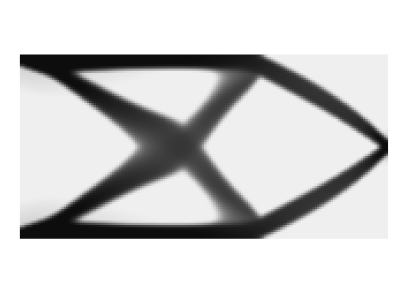

 It:20 Obj:3252.68 Vol:0.32 ch:0.13 
 It:21 Obj:3184.83 Vol:0.32 ch:0.14 


LoadError: [91mInterruptException:[39m

In [353]:

include("./julia/include/_topologyOptimization.jl")
nelx=160
nely=80
volfrac=0.3
rmin=2
penal=3
maxEval=200

tmin=1.5
tmax=3.5

prob=MBB
# prob=poiss


min_max=false
topologyOptimizationMMA1(nelx,nely,prob,volfrac,rmin,penal,maxEval);


Loaded Topology Optimization Library!
 It:1 Obj:833.54 Vol:0.32 ch:0.41 
 It:2 Obj:789.49 Vol:0.34 ch:0.29 
 It:3 Obj:512.63 Vol:0.34 ch:0.22 
 It:4 Obj:411.27 Vol:0.34 ch:0.21 


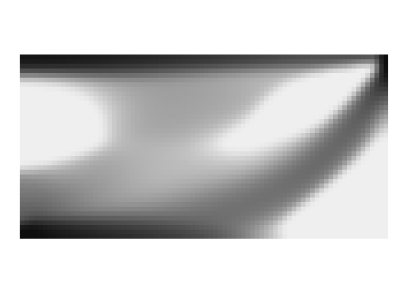

 It:5 Obj:357.53 Vol:0.34 ch:0.2 
 It:6 Obj:322.64 Vol:0.34 ch:0.18 
 It:7 Obj:297.17 Vol:0.34 ch:0.17 
 It:8 Obj:277.3 Vol:0.34 ch:0.17 
 It:9 Obj:260.68 Vol:0.34 ch:0.16 


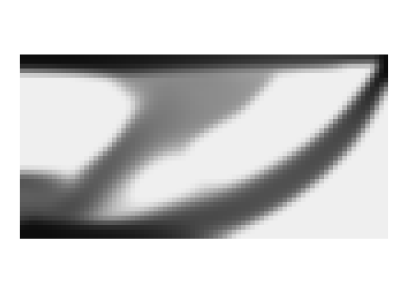

 It:10 Obj:246.06 Vol:0.33 ch:0.14 
 It:11 Obj:234.45 Vol:0.33 ch:0.13 
 It:12 Obj:225.57 Vol:0.33 ch:0.13 
 It:13 Obj:218.63 Vol:0.33 ch:0.12 
 It:14 Obj:213.18 Vol:0.33 ch:0.12 


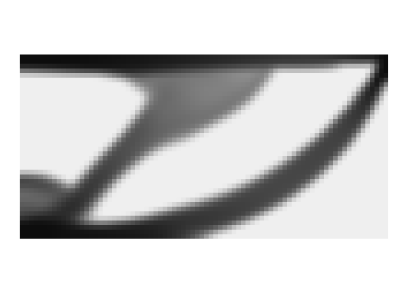

 It:15 Obj:208.91 Vol:0.33 ch:0.11 
 It:16 Obj:205.54 Vol:0.33 ch:0.11 
 It:17 Obj:202.81 Vol:0.33 ch:0.1 
 It:18 Obj:200.51 Vol:0.33 ch:0.1 
 It:19 Obj:198.54 Vol:0.33 ch:0.09 


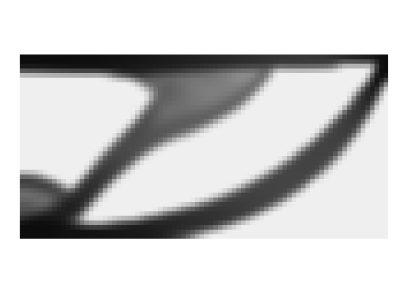

 It:20 Obj:196.83 Vol:0.33 ch:0.09 
 It:21 Obj:195.35 Vol:0.33 ch:0.09 
 It:22 Obj:194.1 Vol:0.33 ch:0.08 
 It:23 Obj:192.99 Vol:0.33 ch:0.08 
 It:24 Obj:192.02 Vol:0.33 ch:0.08 


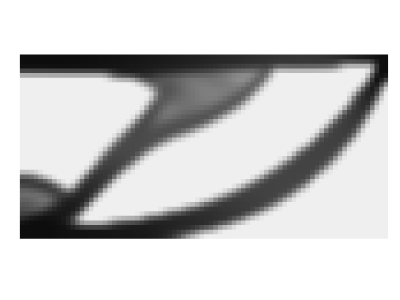

 It:25 Obj:191.19 Vol:0.33 ch:0.07 
 It:26 Obj:190.48 Vol:0.33 ch:0.07 
 It:27 Obj:189.84 Vol:0.33 ch:0.07 
 It:28 Obj:189.28 Vol:0.33 ch:0.07 
 It:29 Obj:188.82 Vol:0.33 ch:0.07 


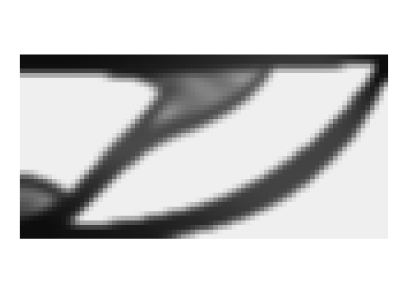

 It:30 Obj:188.41 Vol:0.33 ch:0.06 
 It:31 Obj:188.05 Vol:0.33 ch:0.06 
 It:32 Obj:187.73 Vol:0.33 ch:0.07 
 It:33 Obj:187.43 Vol:0.33 ch:0.06 
 It:34 Obj:187.13 Vol:0.33 ch:0.07 


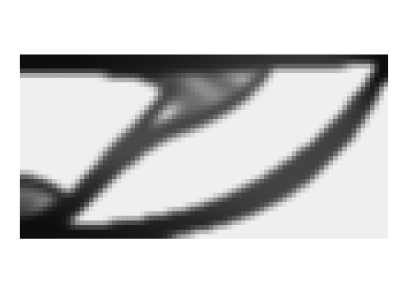

 It:35 Obj:186.84 Vol:0.33 ch:0.08 
 It:36 Obj:186.57 Vol:0.33 ch:0.08 
 It:37 Obj:186.29 Vol:0.33 ch:0.08 
 It:38 Obj:186.02 Vol:0.33 ch:0.08 
 It:39 Obj:185.74 Vol:0.33 ch:0.06 


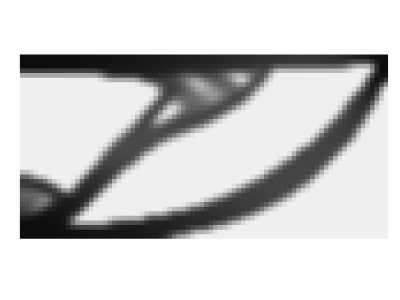

 It:40 Obj:185.47 Vol:0.33 ch:0.08 
 It:41 Obj:185.21 Vol:0.33 ch:0.07 
 It:42 Obj:184.94 Vol:0.33 ch:0.08 
 It:43 Obj:184.66 Vol:0.33 ch:0.08 
 It:44 Obj:184.35 Vol:0.33 ch:0.08 


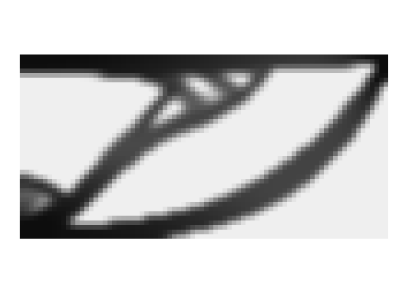

 It:45 Obj:184.04 Vol:0.33 ch:0.08 
 It:46 Obj:183.74 Vol:0.33 ch:0.08 
 It:47 Obj:183.44 Vol:0.33 ch:0.09 
 It:48 Obj:183.18 Vol:0.33 ch:0.08 
 It:49 Obj:182.98 Vol:0.33 ch:0.09 


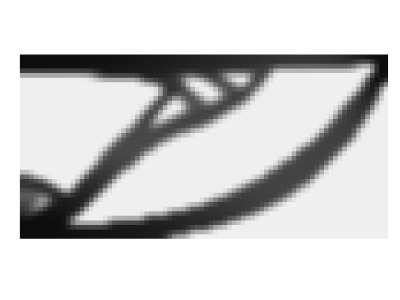

 It:50 Obj:182.78 Vol:0.33 ch:0.06 
 It:51 Obj:182.59 Vol:0.33 ch:0.07 
 It:52 Obj:182.4 Vol:0.33 ch:0.07 
 It:53 Obj:182.22 Vol:0.33 ch:0.07 
 It:54 Obj:182.05 Vol:0.33 ch:0.06 


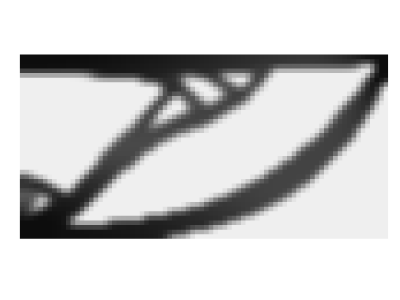

 It:55 Obj:181.9 Vol:0.33 ch:0.06 
 It:56 Obj:181.76 Vol:0.33 ch:0.07 
 It:57 Obj:181.63 Vol:0.33 ch:0.06 
 It:58 Obj:181.51 Vol:0.33 ch:0.06 
 It:59 Obj:181.4 Vol:0.33 ch:0.06 


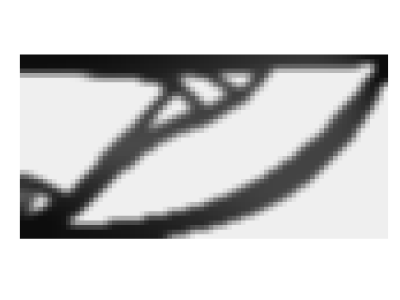

 It:60 Obj:181.29 Vol:0.33 ch:0.06 
 It:61 Obj:181.2 Vol:0.33 ch:0.06 
 It:62 Obj:181.13 Vol:0.33 ch:0.06 
 It:63 Obj:181.05 Vol:0.33 ch:0.05 
 It:64 Obj:180.97 Vol:0.33 ch:0.06 


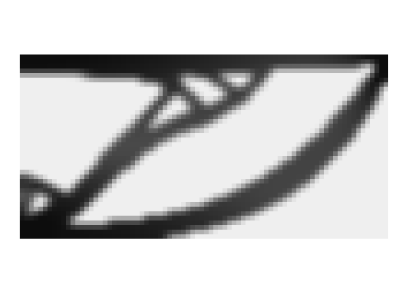

 It:65 Obj:180.88 Vol:0.33 ch:0.05 
 It:66 Obj:180.8 Vol:0.33 ch:0.05 
 It:67 Obj:180.73 Vol:0.33 ch:0.05 
 It:68 Obj:180.66 Vol:0.33 ch:0.05 
 It:69 Obj:180.59 Vol:0.33 ch:0.05 


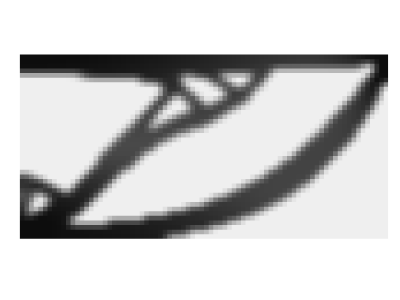

 It:70 Obj:180.52 Vol:0.33 ch:0.05 
 It:71 Obj:180.45 Vol:0.33 ch:0.05 
 It:72 Obj:180.37 Vol:0.33 ch:0.05 
 It:73 Obj:180.29 Vol:0.33 ch:0.04 
 It:74 Obj:180.21 Vol:0.33 ch:0.05 


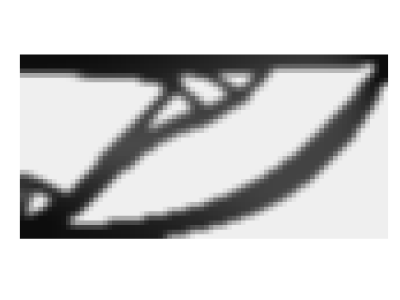

 It:75 Obj:180.14 Vol:0.33 ch:0.05 
 It:76 Obj:180.07 Vol:0.33 ch:0.04 
 It:77 Obj:180.0 Vol:0.33 ch:0.04 
 It:78 Obj:179.93 Vol:0.33 ch:0.05 
 It:79 Obj:179.86 Vol:0.33 ch:0.05 


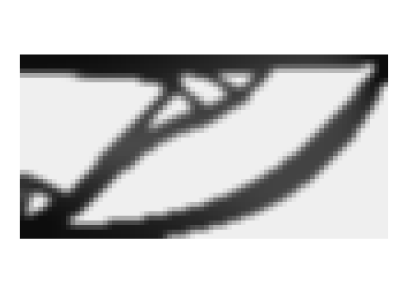

 It:80 Obj:179.79 Vol:0.33 ch:0.05 
 It:81 Obj:179.73 Vol:0.33 ch:0.05 
 It:82 Obj:179.67 Vol:0.33 ch:0.05 
 It:83 Obj:179.61 Vol:0.33 ch:0.04 
 It:84 Obj:179.56 Vol:0.33 ch:0.04 


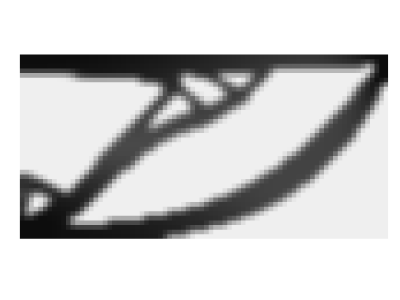

 It:85 Obj:179.51 Vol:0.33 ch:0.04 
 It:86 Obj:179.47 Vol:0.33 ch:0.05 
 It:87 Obj:179.42 Vol:0.33 ch:0.04 
 It:88 Obj:179.38 Vol:0.33 ch:0.05 
 It:89 Obj:179.34 Vol:0.33 ch:0.05 


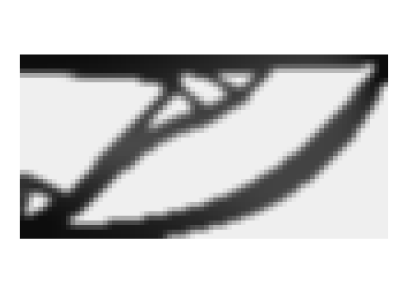

 It:90 Obj:179.31 Vol:0.33 ch:0.05 
 It:91 Obj:179.28 Vol:0.33 ch:0.05 
 It:92 Obj:179.24 Vol:0.33 ch:0.05 
 It:93 Obj:179.2 Vol:0.33 ch:0.04 
 It:94 Obj:179.17 Vol:0.33 ch:0.04 


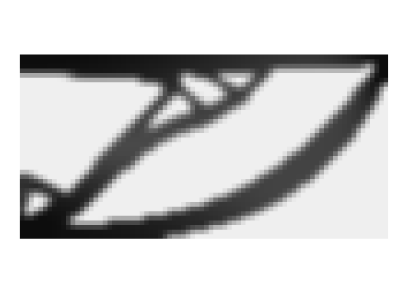

 It:95 Obj:179.14 Vol:0.33 ch:0.04 
 It:96 Obj:179.11 Vol:0.33 ch:0.04 
 It:97 Obj:179.09 Vol:0.33 ch:0.04 
 It:98 Obj:179.07 Vol:0.33 ch:0.04 
 It:99 Obj:179.05 Vol:0.33 ch:0.04 


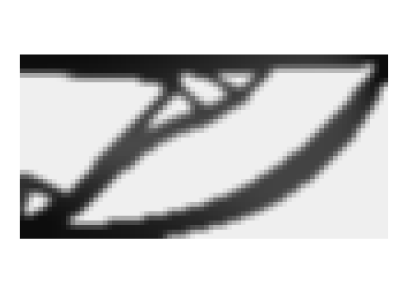

 It:100 Obj:179.03 Vol:0.33 ch:0.04 
 It:101 Obj:179.01 Vol:0.33 ch:0.03 
 It:102 Obj:178.99 Vol:0.33 ch:0.03 
 It:103 Obj:178.97 Vol:0.33 ch:0.03 
 It:104 Obj:178.95 Vol:0.33 ch:0.03 


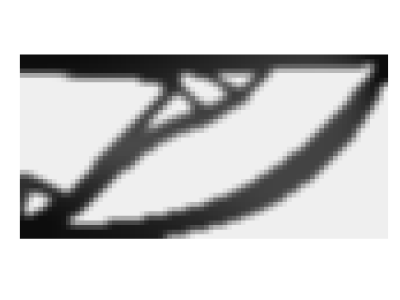

 It:105 Obj:178.94 Vol:0.33 ch:0.03 
 It:106 Obj:178.93 Vol:0.33 ch:0.03 
 It:107 Obj:178.92 Vol:0.33 ch:0.03 
 It:108 Obj:178.92 Vol:0.33 ch:0.03 
 It:109 Obj:178.91 Vol:0.33 ch:0.03 


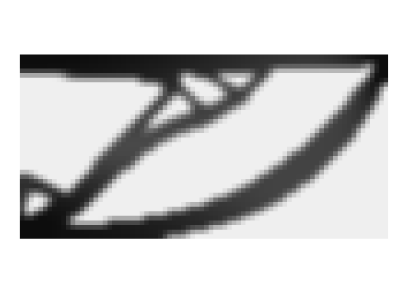

 It:110 Obj:178.91 Vol:0.33 ch:0.03 
 It:111 Obj:178.91 Vol:0.33 ch:0.03 
 It:112 Obj:178.9 Vol:0.33 ch:0.03 
 It:113 Obj:178.89 Vol:0.33 ch:0.03 
 It:114 Obj:178.88 Vol:0.33 ch:0.03 


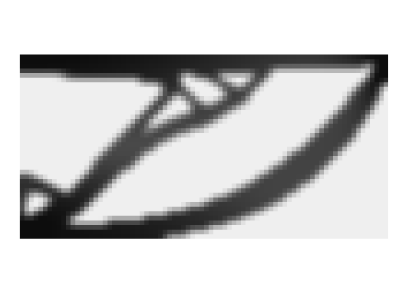

 It:115 Obj:178.88 Vol:0.33 ch:0.03 
 It:116 Obj:178.87 Vol:0.33 ch:0.03 
 It:117 Obj:178.87 Vol:0.33 ch:0.03 
 It:118 Obj:178.86 Vol:0.33 ch:0.03 
 It:119 Obj:178.86 Vol:0.33 ch:0.03 


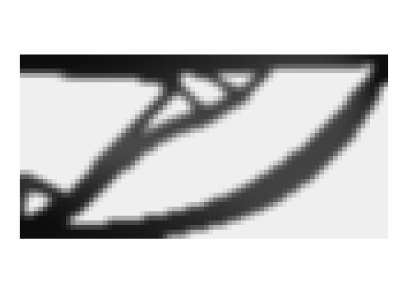

 It:120 Obj:178.85 Vol:0.33 ch:0.03 
 It:121 Obj:178.85 Vol:0.33 ch:0.03 
 It:122 Obj:178.84 Vol:0.33 ch:0.04 
 It:123 Obj:178.83 Vol:0.33 ch:0.04 
 It:124 Obj:178.82 Vol:0.33 ch:0.04 


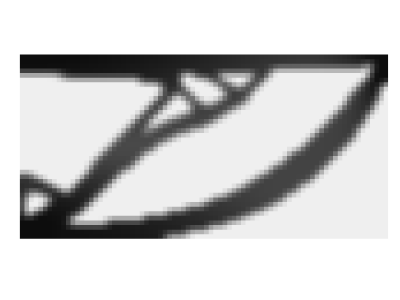

 It:125 Obj:178.81 Vol:0.33 ch:0.03 
 It:126 Obj:178.8 Vol:0.33 ch:0.03 
 It:127 Obj:178.79 Vol:0.33 ch:0.03 
 It:128 Obj:178.78 Vol:0.33 ch:0.03 
 It:129 Obj:178.77 Vol:0.33 ch:0.02 


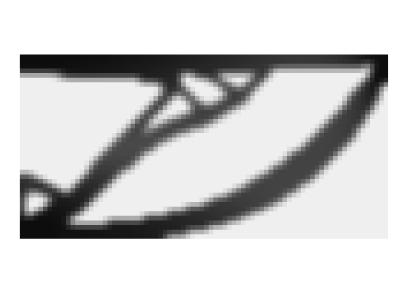

 It:130 Obj:178.77 Vol:0.33 ch:0.02 
 It:131 Obj:178.76 Vol:0.33 ch:0.02 
 It:132 Obj:178.75 Vol:0.33 ch:0.03 
 It:133 Obj:178.75 Vol:0.33 ch:0.03 
 It:134 Obj:178.74 Vol:0.33 ch:0.03 


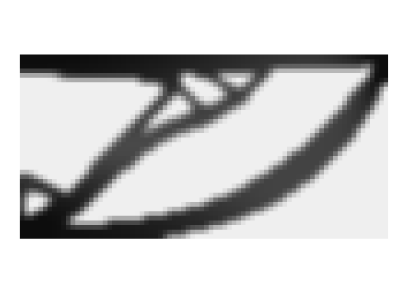

 It:135 Obj:178.73 Vol:0.33 ch:0.03 
 It:136 Obj:178.73 Vol:0.33 ch:0.03 
 It:137 Obj:178.72 Vol:0.33 ch:0.03 
 It:138 Obj:178.71 Vol:0.33 ch:0.03 
 It:139 Obj:178.7 Vol:0.33 ch:0.03 


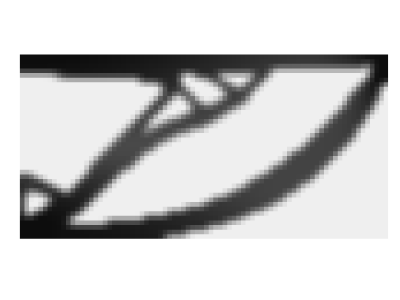

 It:140 Obj:178.7 Vol:0.33 ch:0.03 
 It:141 Obj:178.7 Vol:0.33 ch:0.04 
 It:142 Obj:178.69 Vol:0.33 ch:0.05 
 It:143 Obj:178.66 Vol:0.33 ch:0.06 
 It:144 Obj:178.63 Vol:0.33 ch:0.07 


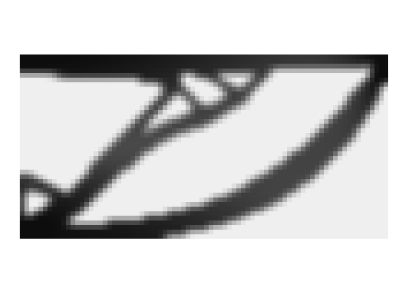

 It:145 Obj:178.58 Vol:0.33 ch:0.07 
 It:146 Obj:178.54 Vol:0.33 ch:0.05 
 It:147 Obj:178.5 Vol:0.33 ch:0.04 
 It:148 Obj:178.47 Vol:0.33 ch:0.03 
 It:149 Obj:178.44 Vol:0.33 ch:0.03 


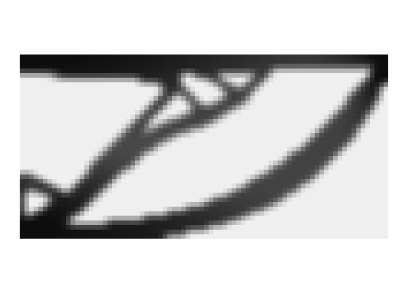

 It:150 Obj:178.43 Vol:0.33 ch:0.03 
 It:151 Obj:178.41 Vol:0.33 ch:0.03 
 It:152 Obj:178.4 Vol:0.33 ch:0.03 
 It:153 Obj:178.39 Vol:0.33 ch:0.03 
 It:154 Obj:178.39 Vol:0.33 ch:0.03 


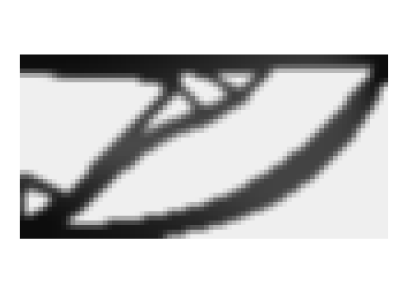

 It:155 Obj:178.38 Vol:0.33 ch:0.03 
 It:156 Obj:178.38 Vol:0.33 ch:0.03 
 It:157 Obj:178.37 Vol:0.33 ch:0.03 
 It:158 Obj:178.37 Vol:0.33 ch:0.03 
 It:159 Obj:178.37 Vol:0.33 ch:0.03 


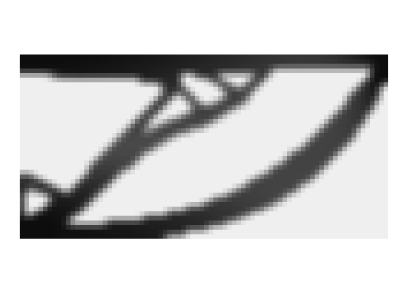

 It:160 Obj:178.37 Vol:0.33 ch:0.03 
 It:161 Obj:178.37 Vol:0.33 ch:0.03 
 It:162 Obj:178.37 Vol:0.33 ch:0.03 
 It:163 Obj:178.37 Vol:0.33 ch:0.03 
 It:164 Obj:178.37 Vol:0.33 ch:0.02 


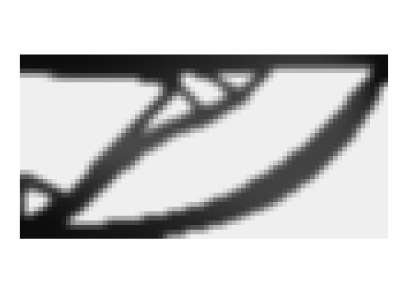

 It:165 Obj:178.37 Vol:0.33 ch:0.02 
 It:166 Obj:178.37 Vol:0.33 ch:0.02 
 It:167 Obj:178.37 Vol:0.33 ch:0.03 
 It:168 Obj:178.37 Vol:0.33 ch:0.03 
 It:169 Obj:178.36 Vol:0.33 ch:0.03 


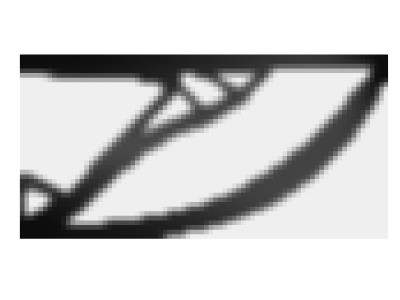

 It:170 Obj:178.36 Vol:0.33 ch:0.03 
 It:171 Obj:178.35 Vol:0.33 ch:0.03 
 It:172 Obj:178.35 Vol:0.33 ch:0.03 
 It:173 Obj:178.34 Vol:0.33 ch:0.03 
 It:174 Obj:178.33 Vol:0.33 ch:0.03 


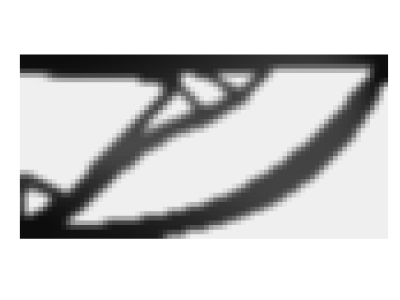

 It:175 Obj:178.33 Vol:0.33 ch:0.03 
 It:176 Obj:178.32 Vol:0.33 ch:0.03 
 It:177 Obj:178.32 Vol:0.33 ch:0.03 
 It:178 Obj:178.31 Vol:0.33 ch:0.03 
 It:179 Obj:178.31 Vol:0.33 ch:0.02 


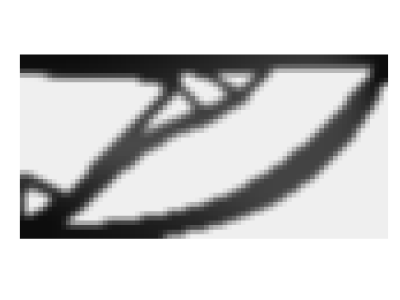

 It:180 Obj:178.31 Vol:0.33 ch:0.02 
 It:181 Obj:178.31 Vol:0.33 ch:0.02 
 It:182 Obj:178.31 Vol:0.33 ch:0.03 
 It:183 Obj:178.3 Vol:0.33 ch:0.03 
 It:184 Obj:178.3 Vol:0.33 ch:0.03 


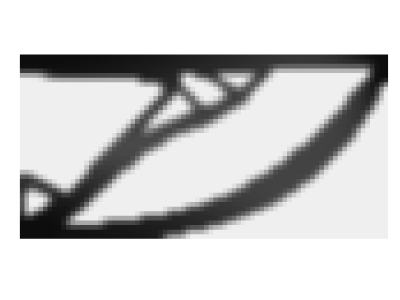

 It:185 Obj:178.29 Vol:0.33 ch:0.03 
 It:186 Obj:178.29 Vol:0.33 ch:0.03 
 It:187 Obj:178.28 Vol:0.33 ch:0.03 
 It:188 Obj:178.28 Vol:0.33 ch:0.03 
 It:189 Obj:178.27 Vol:0.33 ch:0.03 


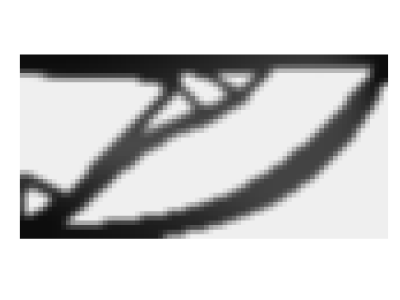

 It:190 Obj:178.26 Vol:0.33 ch:0.03 
 It:191 Obj:178.25 Vol:0.33 ch:0.03 
 It:192 Obj:178.24 Vol:0.33 ch:0.03 
 It:193 Obj:178.24 Vol:0.33 ch:0.03 
 It:194 Obj:178.23 Vol:0.33 ch:0.03 


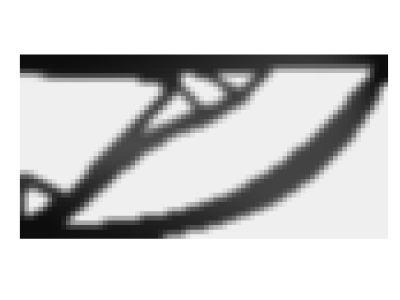

 It:195 Obj:178.22 Vol:0.33 ch:0.03 
 It:196 Obj:178.21 Vol:0.33 ch:0.03 
 It:197 Obj:178.2 Vol:0.33 ch:0.03 
 It:198 Obj:178.19 Vol:0.33 ch:0.03 
 It:199 Obj:178.18 Vol:0.33 ch:0.03 


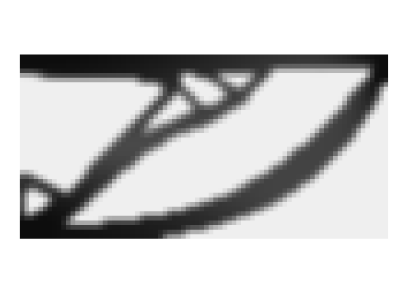

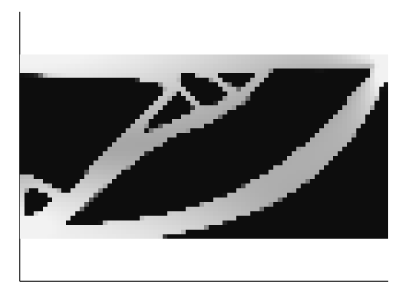

 It:200 Obj:178.17 Vol:0.33 ch:0.04 


In [355]:

include("./julia/include/_topologyOptimization.jl")
nelx=80
nely=40
volfrac=0.3
rmin=2
penal=3
maxEval=200

tmin=1.5
tmax=3.5

prob=MBB
# prob=poiss


min_max=false
topologyOptimizationMMA1(nelx,nely,prob,volfrac,rmin,penal,maxEval);
